In [227]:
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, LabelEncoder

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact
import os


#### Caminho das pastas

In [228]:
caminho = r'C:\Users\leand\OneDrive\Área de Trabalho\Cursos\DNC\Ser Performance'
pasta = []
for pastas in os.listdir(caminho):
    pasta.append(pastas)

print(pasta)

['00D509DB-8BE0-4ACE-A5AD-5BF37386995B', '00D509DB-8BE0-4ACE-A5AD-5BF37386995B-20240718T184006Z-001.zip', '098887C7-B9E5-4BCC-8B68-D20E94CBC297', '147229CD-F3A5-4E75-91DC-7995C01F9438', '15EDFB01-20F8-451D-968C-3D76DA48FA5D', '2BB774CA-42B6-4958-AEAD-BE99DBE606CC', '3B4192CC-761D-45BA-A325-8D023FDC6D3A', '4903AA7A-ACE3-4C66-AD62-3FDBDD13CBF5', '4A74F755-039A-4777-834D-E9D7033E9142', '4C94CE12-1188-4B0C-9122-F2BDE5CB697A', '4F8F5521-B308-4503-89B9-9482D8B24351', '4FC32C34-7C03-4291-9325-6CA7055E7777', '4FF291F2-92A7-49AF-A40E-EB76D8F18F58', '5CD89290-B8DF-414F-9720-5891CD0BCFA5', '5F4387EC-6857-4E6E-94CC-C1CBE1E4F0B4', '6F67F229-B819-4508-891F-4573DB8F3CB2', '7257F457-ED17-4DD5-B738-0C8734A36101', '752351F6-AED0-43AB-B195-EC073589A8BA', '7672F3C1-00A6-42F2-A72C-8804C289CEC9', '79816F71-04C8-4B79-A572-757A0FE29B34', '8C0E7DB8-0B34-4451-B387-795F9B751589', '9DBC9CF3-7B21-410E-A27F-34589AAC3A20', 'A2687A1C-CA71-4245-8697-FE717B66DBF8', 'AB2282B0-7703-42B8-9F34-C06B4EC78790', 'ACE6D50E-AD7E

### usei o laço de repetição para buscar e já nomear as tabelas

In [229]:
cliente =  caminho + '\\' + pasta[0] + '\\'

for csv in os.listdir(cliente):
    if csv.endswith('.csv'):
        if 'acessos' in csv:
            acessos = pd.read_csv(cliente + csv)
        if 'campanha' in csv:
            campanha = pd.read_csv(cliente + csv)
        if 'feedback' in csv:
            feedback = pd.read_csv(cliente + csv)
        if 'produto' in csv:
            produto = pd.read_csv(cliente + csv)
        if 'treinamento' in csv:
            treinamento = pd.read_csv(cliente + csv)
        if 'vendas' in csv:
            vendas = pd.read_csv(cliente + csv)

In [230]:
acessos.head()


,Data,Funcionario,Unidade,Quantidade_de_Acessos,CLI_CODIGO
0,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,9,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
1,2023-06-10,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,6,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
2,2023-06-14,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
3,2023-06-16,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
4,2023-06-20,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,5,00D509DB-8BE0-4ACE-A5AD-5BF37386995B


#### Acessos por Funcionário

In [231]:
funcacessos = acessos.groupby('Funcionario')['Quantidade_de_Acessos'].sum().sort_values(ascending=False)
funcacessos.head(10)

Funcionario
B20A3E46-7DBF-46E9-BDEA-5B13AAB08CE0    18522
4058BE4C-CD1A-40D3-89A6-76142B2BE39D    12584
DCFBB00A-4F15-45E3-83D0-B04E0292BB6E    10129
9D6A61EF-89BD-4AAD-9B83-5ECE41B49C4D     5236
5822DC47-B851-42C3-BDE0-BC9ABAFFBC57     3641
4716A6E5-20E3-42F0-81C6-CCD88070E648     3495
46AAF177-3F15-4CAB-BF67-27DBE9CC6748     2577
29CE7071-A7F0-4FCC-8348-E8F3A19FB381     2576
0EA7A9D3-8569-4082-AA86-9346CF60A095     2399
AC5D28E1-3B90-4D0D-870A-52E3C156AC64     2111
Name: Quantidade_de_Acessos, dtype: int64

#### Acessos por Unidade

In [232]:
unidade = acessos.groupby('Unidade')['Quantidade_de_Acessos'].sum().sort_values(ascending=False)
unidade.head(10)

Unidade
2F775CDD-74A9-4516-B2A4-6D7E643E96EA    25469
FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6    22365
6CAD2F0B-5D9B-4C84-BEAD-D63EFEAB244B    20948
1E3AB2C8-DDB6-4981-AC30-EFFAD5F4DFAC     6142
01CB393F-3FA5-4CFF-95CB-278FC01C9EC6     1934
Name: Quantidade_de_Acessos, dtype: int64

In [233]:
vendas.shape

(10719, 9)

In [234]:
vendas.head()

,Data,Funcionario,Unidade,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,cli_codigo
0,2023-06-02,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,165.0,0.0,165.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
1,2023-06-03,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,915.0,0.0,915.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
2,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,1460.0,116.8,1343.2,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
3,2023-06-06,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,4.0,6850.0,685.0,6165.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B
4,2023-06-07,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,3,6.0,6867.0,511.0,6356.0,00D509DB-8BE0-4ACE-A5AD-5BF37386995B


#### Criei a coluna devoluções

In [235]:
vendas['Devolucoes'] = vendas.apply(lambda row: 'S' if pd.isna(row['N_Produtos']) or row['N_Produtos'] <= 0 else 'N', axis=1)


### Ticket médio

In [236]:
tcktmedio = vendas['Vlr_Bruto'].sum() / vendas.shape[0]
print(f'Ticket médio: R${tcktmedio:.2f}')

Ticket médio: R$10124.14


### Faturamento sem descontos

In [237]:
FatBruto = vendas['Vlr_Bruto'].sum()
print(f'Faturamento bruto:  {FatBruto:.2f}')

Faturamento bruto:  108520678.86


### Faturamento com descontos

In [238]:
fatliq = vendas['Vlr_Liquido'].sum()
print(f'Faturamento líquido:  {fatliq:.2f}')

Faturamento líquido:  101700863.59


### Total de Descontos

In [239]:
total_descontos = vendas['Vlr_Desconto'].sum()
print(f'Total de descontos:  {total_descontos:.2f}')

Total de descontos:  5287770.73


#### Total de produtos vendidos

In [240]:
totprod = vendas['N_Produtos'].sum()
print(f'Total de produtos:  {totprod:.0f} unidades')

Total de produtos:  175116 unidades


#### Top 10 Funcionários que mais venderam

In [241]:
func_rank = vendas['Funcionario'].value_counts()
top10func = func_rank.head(10)
top10func

Funcionario
B20A3E46-7DBF-46E9-BDEA-5B13AAB08CE0    1281
5822DC47-B851-42C3-BDE0-BC9ABAFFBC57     901
0EA7A9D3-8569-4082-AA86-9346CF60A095     862
46AAF177-3F15-4CAB-BF67-27DBE9CC6748     809
24985D0E-9EDF-443D-BF33-CE5CD150100B     778
21A46DC1-490D-4077-9038-8BF460B71751     740
6E478F40-59BE-4210-BFD7-E8F236A02724     568
AC5D28E1-3B90-4D0D-870A-52E3C156AC64     536
4716A6E5-20E3-42F0-81C6-CCD88070E648     529
E6C62F5A-21C7-4F83-B6A2-83A03B208343     512
Name: count, dtype: int64

#### Funcionários que menos venderam

In [242]:
tail10func = func_rank.tail(10)
tail10func

Funcionario
F69F7D87-4788-40F3-890B-997300670DAA    27
4058BE4C-CD1A-40D3-89A6-76142B2BE39D    18
56D190B4-86F4-404B-B94F-6B57C54EB2D0    16
DC582867-D718-46E5-8036-1C0317044475    13
75CAA7DE-1065-48CD-9EFF-4C1AAFE4CF29    11
D28853F4-40DB-45A7-99E9-52E5FAD1C3B1     9
2F01257F-2824-40E1-BF56-1B1813D81792     7
9248F096-EC8F-4948-AD93-D30C3DBE701F     4
76F47389-5FC9-4D79-9C4E-EEEF9FAF10BE     2
1A2B6CA2-1951-4D41-A175-85C8E8312564     1
Name: count, dtype: int64

#### Devoluções

In [243]:
devolucao = vendas['Devolucoes'].value_counts()
devolucao

Devolucoes
N    10346
S      373
Name: count, dtype: int64

#### Total de funcionários desse cliente

In [244]:
total_funcionarios = len(vendas['Funcionario'].unique())
print(f'Nessa unidade temos:  {total_funcionarios} funcionários')

Nessa unidade temos:  40 funcionários


In [245]:
funcionarios_devoluçoes = vendas.groupby('Funcionario')['Devolucoes'].value_counts().reset_index()
funcionarios_devolucoes = funcionarios_devoluçoes.sort_values(by='count', ascending=False)

funcionarios_dev_S = funcionarios_devolucoes[funcionarios_devolucoes['Devolucoes'] == 'S']	

top10func_dev_x_fat = funcionarios_dev_S.head(10)


### (Top 10)  Funcionário que tiveram Devolução

In [246]:
contagem = top10func_dev_x_fat.groupby('count')

In [247]:
contagem.head(10)

,Funcionario,Devolucoes,count
3,0EA7A9D3-8569-4082-AA86-9346CF60A095,S,33
60,AC5D28E1-3B90-4D0D-870A-52E3C156AC64,S,31
24,46AAF177-3F15-4CAB-BF67-27DBE9CC6748,S,25
26,4716A6E5-20E3-42F0-81C6-CCD88070E648,S,25
49,913BBDB4-F391-46FC-A805-96809536B1F4,S,24
38,6E478F40-59BE-4210-BFD7-E8F236A02724,S,21
36,5822DC47-B851-42C3-BDE0-BC9ABAFFBC57,S,21
72,E6C62F5A-21C7-4F83-B6A2-83A03B208343,S,19
16,24985D0E-9EDF-443D-BF33-CE5CD150100B,S,18
56,A3C61F2F-F4AE-4823-ADD4-B566315C7467,S,17


### Faturamento dos 10 Funcionários que mais tiveram devolução

In [248]:
for fat_p_func in top10func_dev_x_fat['Funcionario']:
    fat_func = vendas[vendas['Funcionario'] == fat_p_func]['Vlr_Liquido'].sum()
    top10func_dev_x_fat['Faturamento_Liquido'] = top10func_dev_x_fat['Funcionario'].apply(
    lambda x: vendas[vendas['Funcionario'] == x]['Vlr_Liquido'].sum()
)
    print(f'Faturamento líquido do funcionário {fat_p_func}: R$ {fat_func:.2f}')

Faturamento líquido do funcionário 0EA7A9D3-8569-4082-AA86-9346CF60A095: R$ 6440970.96
Faturamento líquido do funcionário AC5D28E1-3B90-4D0D-870A-52E3C156AC64: R$ 3390391.16
Faturamento líquido do funcionário 46AAF177-3F15-4CAB-BF67-27DBE9CC6748: R$ 5855467.40
Faturamento líquido do funcionário 4716A6E5-20E3-42F0-81C6-CCD88070E648: R$ 4888718.20
Faturamento líquido do funcionário 913BBDB4-F391-46FC-A805-96809536B1F4: R$ 1376148.15
Faturamento líquido do funcionário 6E478F40-59BE-4210-BFD7-E8F236A02724: R$ 5025550.60
Faturamento líquido do funcionário 5822DC47-B851-42C3-BDE0-BC9ABAFFBC57: R$ 6693175.44
Faturamento líquido do funcionário E6C62F5A-21C7-4F83-B6A2-83A03B208343: R$ 3040675.69
Faturamento líquido do funcionário 24985D0E-9EDF-443D-BF33-CE5CD150100B: R$ 5222761.04
Faturamento líquido do funcionário A3C61F2F-F4AE-4823-ADD4-B566315C7467: R$ 2156454.07


C:\Users\leand\AppData\Local\Temp\ipykernel_24548\2000809892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10func_dev_x_fat['Faturamento_Liquido'] = top10func_dev_x_fat['Funcionario'].apply(


In [249]:
top10func_dev_x_fat

,Funcionario,Devolucoes,count,Faturamento_Liquido
3,0EA7A9D3-8569-4082-AA86-9346CF60A095,S,33,6440970.96
60,AC5D28E1-3B90-4D0D-870A-52E3C156AC64,S,31,3390391.16
24,46AAF177-3F15-4CAB-BF67-27DBE9CC6748,S,25,5855467.40
26,4716A6E5-20E3-42F0-81C6-CCD88070E648,S,25,4888718.20
49,913BBDB4-F391-46FC-A805-96809536B1F4,S,24,1376148.15
38,6E478F40-59BE-4210-BFD7-E8F236A02724,S,21,5025550.60
36,5822DC47-B851-42C3-BDE0-BC9ABAFFBC57,S,21,6693175.44
72,E6C62F5A-21C7-4F83-B6A2-83A03B208343,S,19,3040675.69
16,24985D0E-9EDF-443D-BF33-CE5CD150100B,S,18,5222761.04
56,A3C61F2F-F4AE-4823-ADD4-B566315C7467,S,17,2156454.07


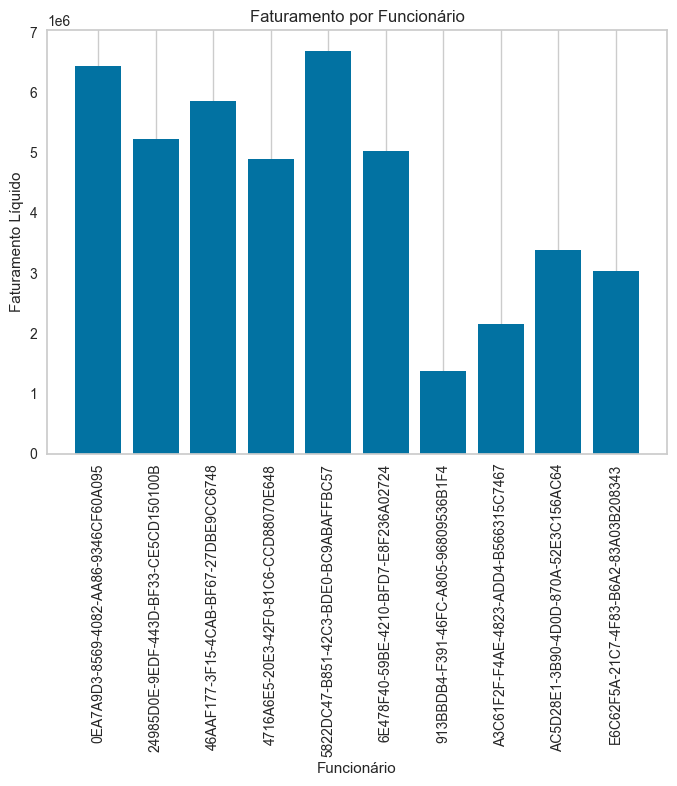

In [250]:
grouped_data = top10func_dev_x_fat.groupby('Funcionario')['Faturamento_Liquido'].sum().reset_index()

# Criando as barras
plt.bar(grouped_data['Funcionario'], grouped_data['Faturamento_Liquido']) 
plt.xticks(rotation=90)

plt.xlabel('Funcionário')
plt.ylabel('Faturamento Líquido')
plt.title('Faturamento por Funcionário')
plt.grid(axis='y')

plt.show()

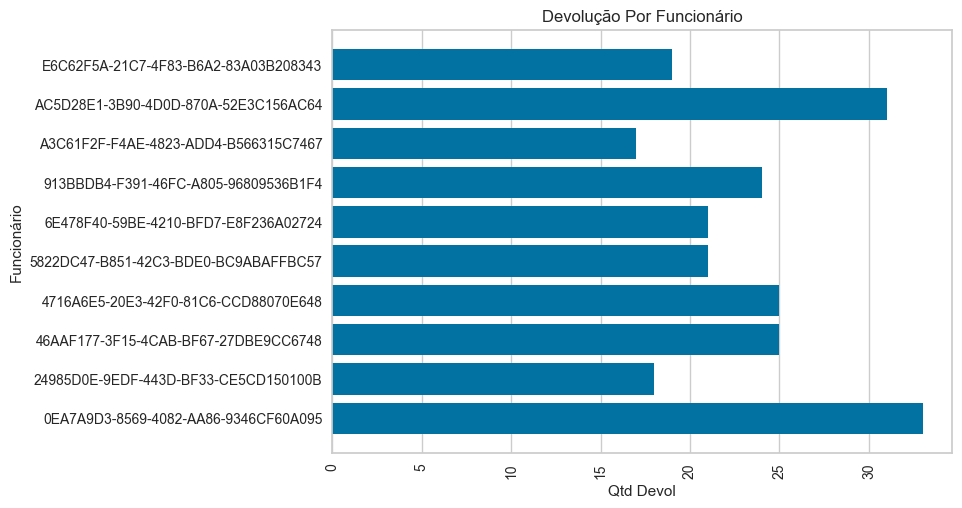

In [251]:
grouped_data = top10func_dev_x_fat.groupby('Funcionario')['count'].sum().reset_index()

# Criando as barras
plt.barh(grouped_data['Funcionario'], grouped_data['count']) 
plt.xticks(rotation=90)

plt.xlabel('Qtd Devol')
plt.ylabel('Funcionário')
plt.title('Devolução Por Funcionário')
plt.grid(axis='y')

plt.show()

In [252]:
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Periodo                15 non-null     object 
 1   Treinamento            15 non-null     object 
 2   Categoria_Treinamento  15 non-null     object 
 3   Funcionario            15 non-null     object 
 4   Unidade                15 non-null     object 
 5   Nota_Final             0 non-null      float64
 6   Status                 15 non-null     object 
 7   Cliente                15 non-null     object 
dtypes: float64(1), object(7)
memory usage: 1.1+ KB


In [253]:
funcionarios = []
for funcionario in treinamento['Funcionario'].unique():
    funcionarios.append(funcionario)
   

print(funcionarios)

['4A8ED9EE-2276-40D3-A626-095EA6920B6D', 'B20A3E46-7DBF-46E9-BDEA-5B13AAB08CE0', 'F69F7D87-4788-40F3-890B-997300670DAA', '4058BE4C-CD1A-40D3-89A6-76142B2BE39D', 'DCFBB00A-4F15-45E3-83D0-B04E0292BB6E', '29CE7071-A7F0-4FCC-8348-E8F3A19FB381']


In [254]:
vendas['Treinamento'] = 'S'

In [255]:
vendas['Treinamento'].value_counts()

Treinamento
S    10719
Name: count, dtype: int64

In [256]:
for i, f in enumerate(funcionarios):
    if f in vendas['Funcionario'][i]:
        vendas['Treinamento'][i] = 'S'
    else:
        vendas['Treinamento'][i] = 'N'

C:\Users\leand\AppData\Local\Temp\ipykernel_24548\3859859234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas['Treinamento'][i] = 'N'
C:\Users\leand\AppData\Local\Temp\ipykernel_24548\3859859234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas['Treinamento'][i] = 'N'
C:\Users\leand\AppData\Local\Temp\ipykernel_24548\3859859234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas['Treinamento'][i] = 'N'
C:\User

In [257]:
vendas.head(15)

,Data,Funcionario,Unidade,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,cli_codigo,Devolucoes,Treinamento
0,2023-06-02,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,165.00,0.00,165.00,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,N
1,2023-06-03,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,915.00,0.00,915.00,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,N
2,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,1460.00,116.80,1343.20,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,N
3,2023-06-06,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,4.0,6850.00,685.00,6165.00,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,N
4,2023-06-07,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,3,6.0,6867.00,511.00,6356.00,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,N
5,2023-06-09,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,3.0,8794.11,1011.30,7782.78,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,N
6,2023-06-10,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,4,20.0,37847.00,2262.90,35583.92,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S
7,2023-06-12,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,2,14.0,14698.80,1143.76,13554.93,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S
8,2023-06-15,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,0.0,0.00,-32.38,32.40,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,S,S
9,2023-06-16,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,4.0,7365.00,0.00,7365.00,00D509DB-8BE0-4ACE-A5AD-5BF37386995B,N,S


In [258]:
vendas = vendas.drop(columns=['cli_codigo'])

In [259]:
vendas.Data.agg(['min', 'max'])	

min    2021-01-01
max    2024-07-01
Name: Data, dtype: object

<Axes: >

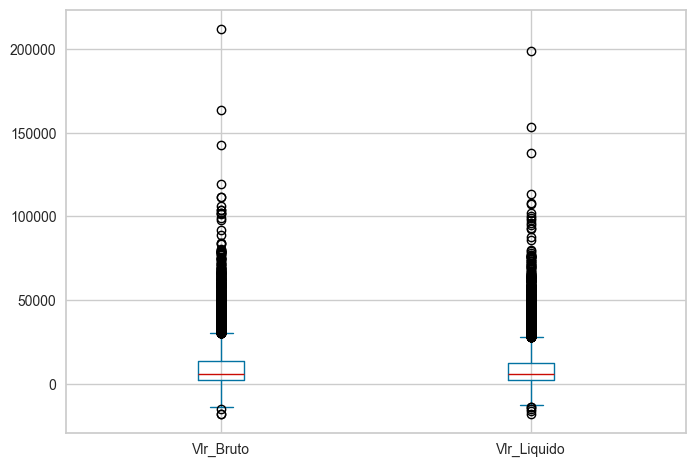

In [260]:
vendas[['Vlr_Bruto', 'Vlr_Liquido']].plot.box()

In [261]:

def analisar_dados(df):

    # Filtra apenas as linhas onde ambas as colunas existem
    df = df[['Devolucoes', 'Treinamento']].dropna()

    # Cria uma nova coluna com a combinação dos valores
    df['Combinacao'] = df['Devolucoes'] + '_' + df['Treinamento']

    # Conta a frequência de cada combinação
    contagens = df['Combinacao'].value_counts().to_dict()

    # Retorna um dicionário com as contagens desejadas
    return {
        'Ambos Sim': contagens.get('S_S', 0),
        'S em Devoluções e N em Treinamento': contagens.get('S_N', 0),
        'N em Devoluções e S em Treinamento': contagens.get('N_S', 0)
    }

# Carregando o DataFrame (substitua 'seu_arquivo.csv' pelo seu arquivo)
# Chamando a função e imprimindo os resultados
resultados = analisar_dados(vendas)
print(resultados)


{'Ambos Sim': 373, 'S em Devoluções e N em Treinamento': 0, 'N em Devoluções e S em Treinamento': 10340}


In [262]:
vendas['Devolucoes'] = vendas['Devolucoes'].map({'S': 1, 'N': 0})
vendas['Treinamento'] = vendas['Treinamento'].map({'S': 1, 'N': 0})

In [263]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10719 entries, 0 to 10718
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          10719 non-null  object 
 1   Funcionario   10719 non-null  object 
 2   Unidade       10719 non-null  object 
 3   N_Boletos     10719 non-null  int64  
 4   N_Produtos    10719 non-null  float64
 5   Vlr_Bruto     10719 non-null  float64
 6   Vlr_Desconto  10719 non-null  float64
 7   Vlr_Liquido   10719 non-null  float64
 8   Devolucoes    10719 non-null  int64  
 9   Treinamento   10719 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 837.6+ KB


In [264]:
vendas.head()

,Data,Funcionario,Unidade,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,Devolucoes,Treinamento
0,2023-06-02,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,165.0,0.0,165.0,0,0
1,2023-06-03,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,915.0,0.0,915.0,0,0
2,2023-06-05,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,1.0,1460.0,116.8,1343.2,0,0
3,2023-06-06,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,1,4.0,6850.0,685.0,6165.0,0,0
4,2023-06-07,8EB10BCB-42E7-42EF-AF88-07BE7BA740C3,FE9FCF8B-590E-4C08-B6F5-20B0A6CCF8E6,3,6.0,6867.0,511.0,6356.0,0,0


In [265]:
numerical_columns = ['N_Produtos', 'Vlr_Bruto', 'Vlr_Liquido', 'Vlr_Desconto']
vendas[numerical_columns] = vendas[numerical_columns].apply(scale)

In [266]:
categorical_columns = ['Funcionario', 'Unidade']
categorical_idx = vendas.columns.isin(categorical_columns).nonzero()[0].tolist()

In [267]:
vendas.Funcionario = LabelEncoder().fit_transform(vendas.Funcionario)
vendas.Unidade = LabelEncoder().fit_transform(vendas.Unidade)

In [268]:
vendas = vendas.drop(columns=['Data'])

vendas.head()

,Funcionario,Unidade,N_Boletos,N_Produtos,Vlr_Bruto,Vlr_Desconto,Vlr_Liquido,Devolucoes,Treinamento
0,24,13,1,-0.698443,-0.785953,-0.547908,-0.775765,0,0
1,24,13,1,-0.698443,-0.726765,-0.547908,-0.713357,0,0
2,24,13,1,-0.698443,-0.683755,-0.418181,-0.677726,0,0
3,24,13,1,-0.561824,-0.258388,0.212908,-0.276501,0,0
4,24,13,3,-0.470744,-0.257046,0.019650,-0.260608,0,0


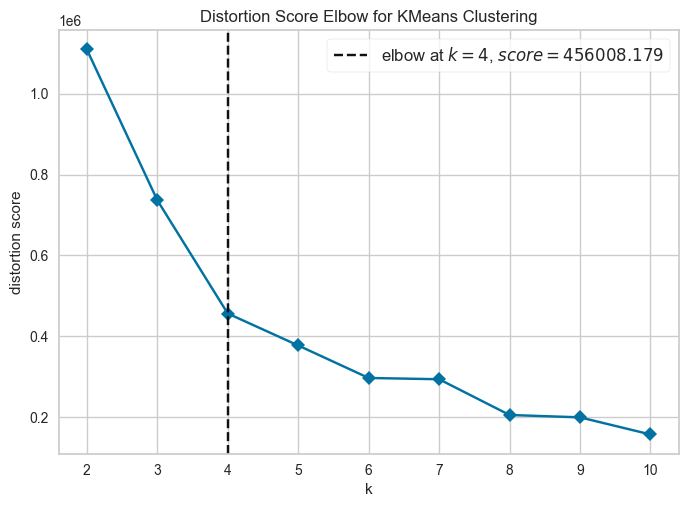

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [273]:
kelbow_visualizer(KMeans(), vendas, k=10, timings=False)

In [274]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = vendas.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,1109486.084148,0.521939,0.838793,12226.074715
3,736473.851173,0.451426,0.773088,11922.070073
4,456008.179235,0.475309,0.794027,15031.994021
5,364743.600865,0.490230,0.739032,14763.813622
6,323156.588144,0.492216,0.722394,13605.501599
7,282414.568060,0.456078,0.830695,13229.908791
8,207433.297170,0.479266,0.764354,15990.644968
9,192904.092592,0.477427,0.850615,15145.081403
10,170294.967541,0.476006,0.819962,15406.160425


In [293]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(vendas)

In [294]:
px.scatter_3d(vendas, x='Vlr_Bruto', y='Vlr_Liquido', z='Vlr_Desconto', color=kmeans_labels.astype(str), template='plotly_dark')

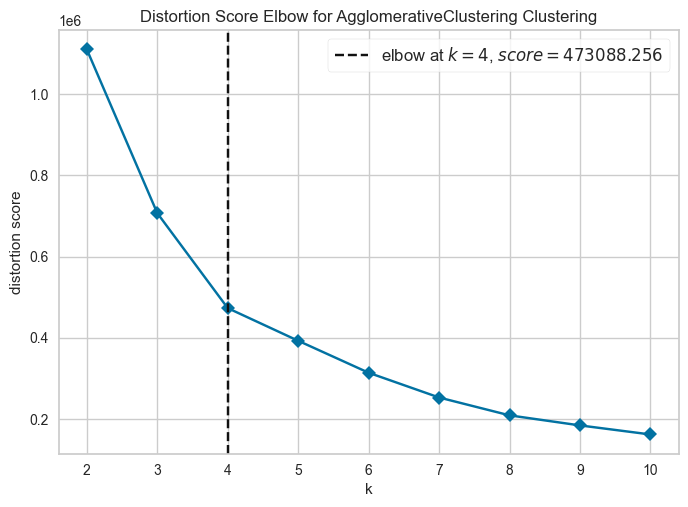

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [295]:
kelbow_visualizer(AgglomerativeClustering(), vendas, k=10, timings=False)

In [296]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = vendas.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  # cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.522941,0.837872,12213.065277
3,0.524072,0.617041,12641.560044
4,0.471452,0.800821,14360.339308
5,0.464992,0.780723,13523.103901
6,0.468620,0.728559,14067.914807
7,0.498130,0.688965,14978.293136
8,0.489413,0.726444,15858.336942
9,0.482312,0.736491,15921.476478
10,0.482781,0.719212,16263.906923


In [297]:
hclust = AgglomerativeClustering(n_clusters=4)
hclust_labels = hclust.fit_predict(vendas)

In [298]:
px.scatter_3d(vendas, x='Vlr_Bruto', y='Vlr_Liquido', z='Vlr_Desconto', color=hclust_labels.astype(str), template='plotly_dark')

In [299]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = vendas.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
24,-242469.975928,7,full
28,-237666.522106,8,full
20,-217451.435452,6,full
16,-203497.592663,5,full
12,-179352.166736,4,full


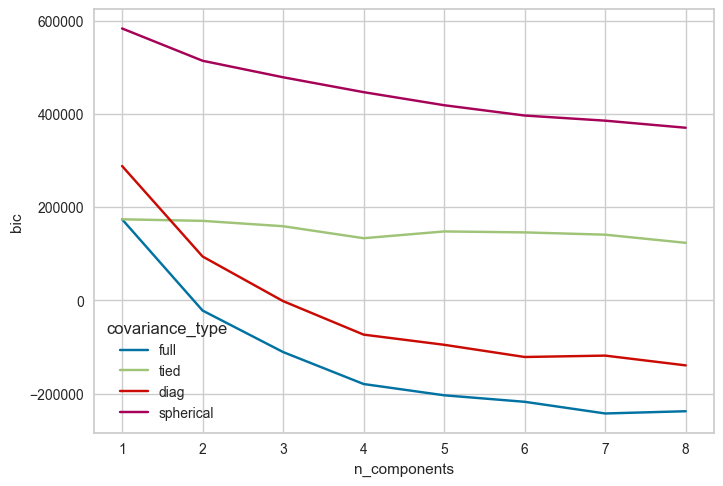

In [300]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

In [301]:
mclust = GaussianMixture(n_components=5, covariance_type='full', n_init=10)
mclust_labels = mclust.fit_predict(vendas)

In [302]:
px.scatter_3d(vendas, x='Vlr_Bruto', y='Vlr_Liquido', z='Vlr_Desconto', color=mclust_labels.astype(str), template='plotly_dark')

In [303]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=vendas.columns)

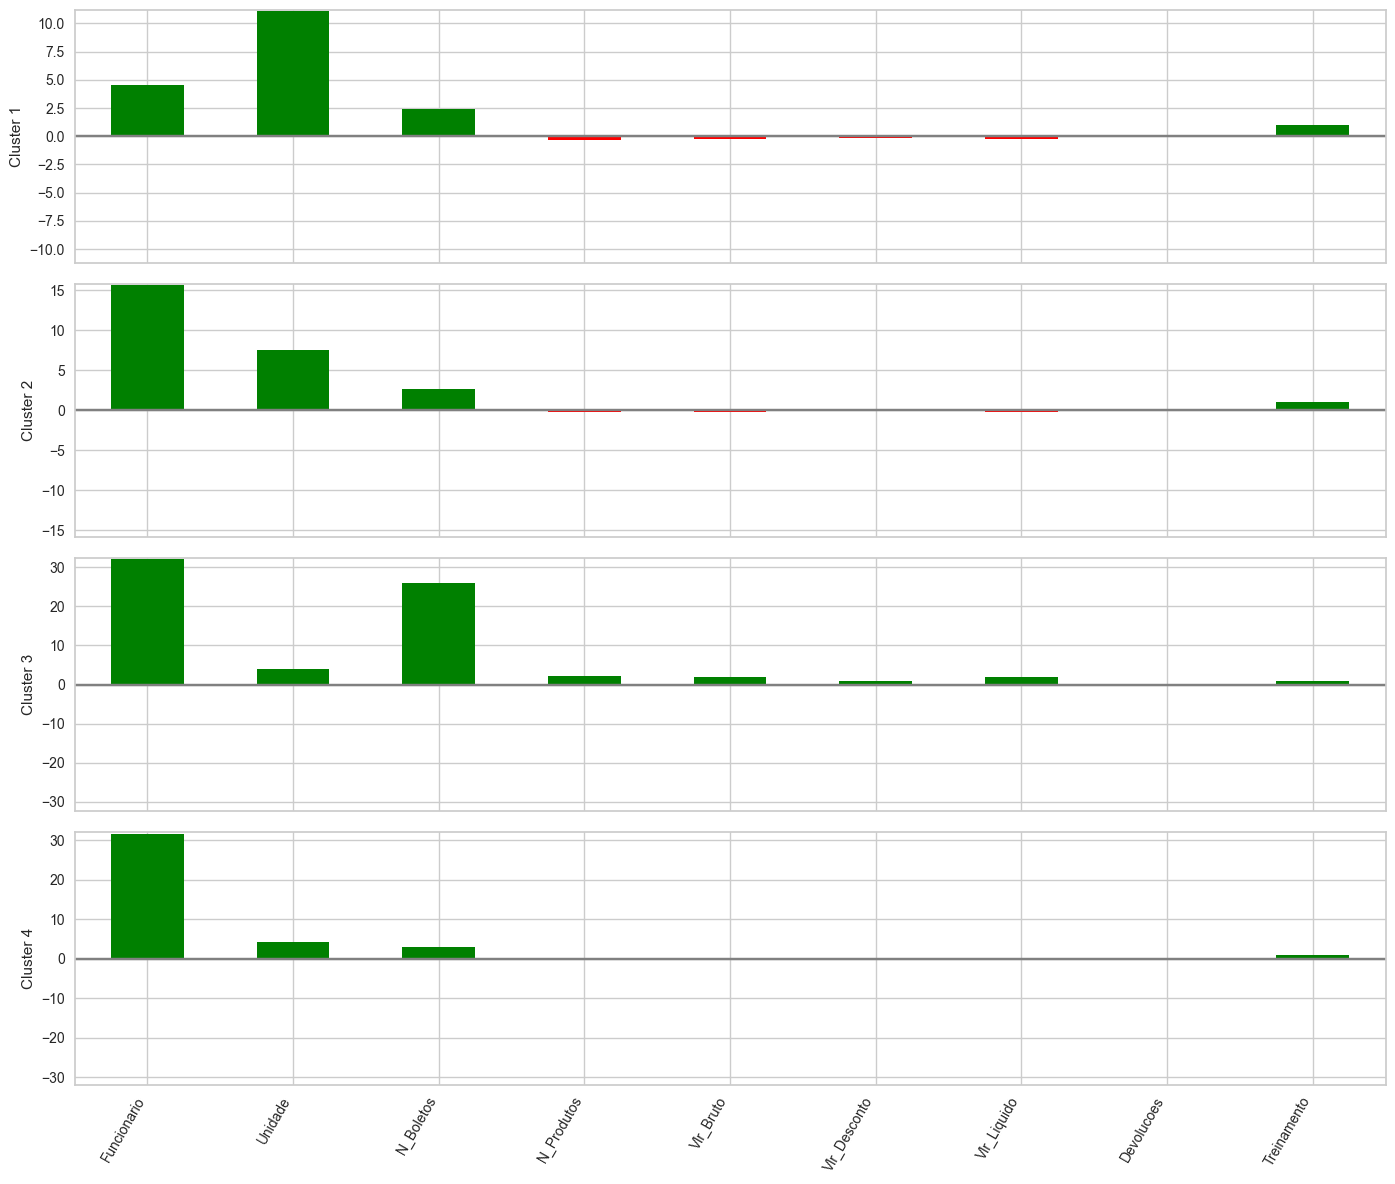

In [304]:
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none') 

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [305]:
(
  vendas.assign(cluster=kmeans_labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
Funcionario,4.588198,15.620135,31.973468,31.644238
Unidade,11.080038,7.569538,4.014639,4.313612
N_Boletos,2.397677,2.624286,25.914913,2.924207
N_Produtos,-0.306952,-0.181636,2.193858,-0.278388
Vlr_Bruto,-0.236956,-0.163559,1.965650,-0.295111
Vlr_Desconto,-0.150151,-0.031161,0.961428,-0.174929
Vlr_Liquido,-0.239387,-0.168769,1.993363,-0.296065
Devolucoes,0.032015,0.038402,0.000000,0.047564
Treinamento,1.000000,0.998443,1.000000,1.000000
